##Imports, Dataset Loading

In [14]:

import os
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.metrics import (
    accuracy_score, classification_report,
    mean_squared_error, r2_score
)

from sklearn.linear_model import LogisticRegression, LinearRegression, Perceptron
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestClassifier, RandomForestRegressor,
    GradientBoostingClassifier, AdaBoostClassifier
)
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

plt.rcParams['font.family'] = 'DejaVu Sans'


In [15]:

# Load datasets
train_df = pd.read_excel("Train.xlsx")
test_df = pd.read_excel("Test.xlsx")

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
train_df.head()


Train shape: (850, 23)
Test shape: (170, 23)


,userID,autocorrLag1IKD,avgBurstLength,avgHoldTime,avgIKD,avgPauseLength,backspaceCount,backspaceRatio,burstCount,commonDigraphTiming,...,holdTimeStdDev,ikdStdDev,maxBurstLength,medianIKD,name,pauseCount,shiftPressCount,skewnessIKD,tempoChangeRate,typingSpeedWPM
0,1,-0.002090,80.000000,94.501000,117.084000,0.000000,6.000000,0.074000,1.000000,76.040000,...,19.296000,59.322000,80.000000,101.800000,Ammar Ahmed,0.000000,0.000000,1.956573,0.692000,55.000000
1,1,0.060646,70.760716,97.626946,122.845754,0.058128,4.896679,0.046157,0.979272,47.820607,...,23.802988,64.172429,73.449244,105.313694,Ammar Ahmed,0.070700,-0.206487,1.546336,0.623761,76.465379
2,1,0.128373,72.092142,98.855506,126.540442,-0.038170,3.071730,0.004722,0.938096,61.070158,...,24.082542,48.132909,70.932991,99.041219,Ammar Ahmed,-0.042337,-0.073889,1.355608,0.686964,76.569714
3,1,0.179325,71.247080,99.974140,116.344448,-0.033221,0.691202,0.082531,0.960102,27.325629,...,24.139702,78.219066,73.966946,103.631198,Ammar Ahmed,0.026091,0.320869,1.709092,0.682309,72.942888
4,1,-0.015958,69.659911,96.309592,125.740592,-0.040863,4.995430,0.002485,1.008135,80.392833,...,24.356491,61.720905,72.869306,105.490453,Ammar Ahmed,-0.030735,0.256213,1.958183,0.660214,65.005500


##Exploratory Data Analysis (EDA)

In [16]:

train_df.describe()


,userID,autocorrLag1IKD,avgBurstLength,avgHoldTime,avgIKD,avgPauseLength,backspaceCount,backspaceRatio,burstCount,commonDigraphTiming,...,errorRate,holdTimeStdDev,ikdStdDev,maxBurstLength,medianIKD,pauseCount,shiftPressCount,skewnessIKD,tempoChangeRate,typingSpeedWPM
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,...,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000
mean,9.001176,0.070427,26.893483,103.787002,283.560922,594.861591,6.315658,0.068280,11.304300,95.047614,...,0.069281,40.937652,220.104315,37.215609,211.792620,10.336604,1.459662,1.920722,0.706069,38.806774
std,4.900542,0.105485,26.845119,20.444145,144.836301,378.074129,6.278196,0.055206,10.709179,73.018142,...,0.055841,21.513929,153.727067,25.113742,95.640328,10.726384,2.186668,0.968921,0.061150,22.247764
min,1.000000,-0.288772,-10.021462,53.945000,85.501000,-400.172059,-4.146002,-0.085621,-3.035198,-167.111390,...,-0.127049,-31.019913,35.879000,3.135090,74.900000,-2.386684,-6.668370,-0.183875,0.469000,2.608843
25%,5.000000,0.005624,3.884748,93.086750,168.496500,235.919469,2.195337,0.030000,2.000000,51.327834,...,0.030000,27.458319,91.228750,13.000000,144.012500,1.000000,0.000000,1.345940,0.667582,20.558230
50%,9.000000,0.064262,15.000000,100.388308,232.208500,712.333397,4.000000,0.054000,6.232876,80.492119,...,0.056449,35.113500,170.049500,32.000000,181.930050,5.170933,1.000000,1.628331,0.700000,32.582260
75%,13.000000,0.134361,53.663115,114.827000,426.971870,864.837750,8.988201,0.092102,20.000000,128.500425,...,0.094000,47.721555,310.256500,64.000000,299.201578,19.000000,2.106227,2.223289,0.747554,55.000000
max,17.000000,0.456345,114.000000,179.949000,903.183000,1823.414000,50.000000,0.333000,58.000000,1015.710000,...,0.333000,198.914000,971.071000,114.000000,585.100000,57.000000,17.000000,7.325196,0.903000,110.179412


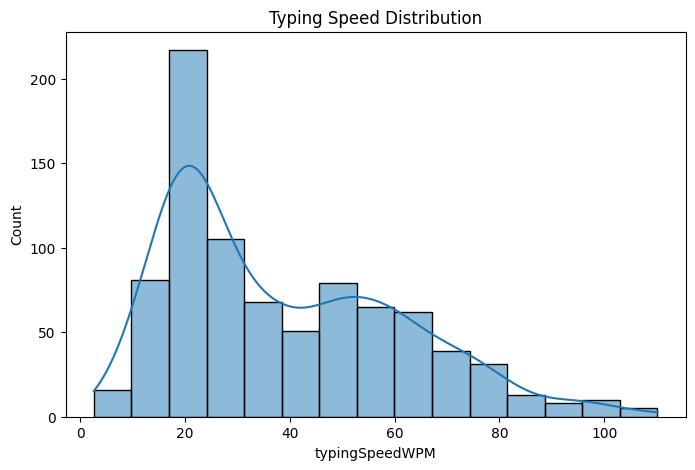

In [17]:

plt.figure(figsize=(8,5))
sns.histplot(train_df["typingSpeedWPM"], kde=True)
plt.title("Typing Speed Distribution")
plt.show()


##Feature Correlation Matrix

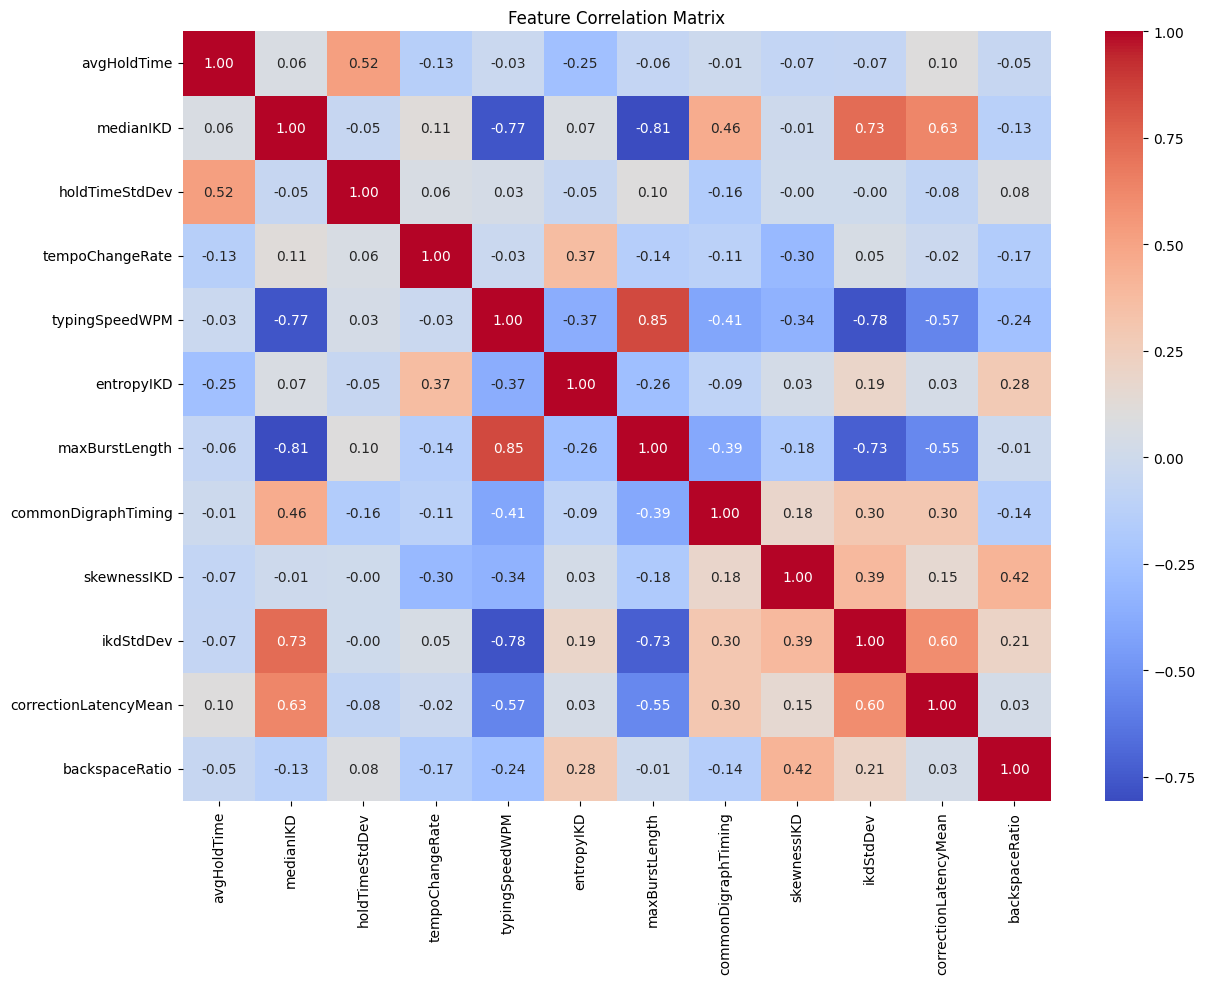

In [18]:

features = [
    "avgHoldTime","medianIKD","holdTimeStdDev","tempoChangeRate",
    "typingSpeedWPM","entropyIKD","maxBurstLength","commonDigraphTiming",
    "skewnessIKD","ikdStdDev","correctionLatencyMean","backspaceRatio"
]

plt.figure(figsize=(14,10))
corr = train_df[features].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


##Feature Selection using ANOVA & RF

In [19]:
# data preprocessing
df = pd.read_excel('dataset.xlsx')
df_proc = df.copy()

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [c for c in numeric_cols if c not in ["userID"]]

for col in numeric_cols:
    if df_proc[col].isnull().any():
        df_proc[col] = df_proc[col].fillna(df_proc[col].median())

X = df_proc.drop(columns=["name"] + (["userID"] if "userID" in df_proc.columns else []))
y = df_proc["name"].astype(str)
print("Feature count:", X.shape[1])

le = LabelEncoder()
y_enc = le.fit_transform(y)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# feature selection
selected_features = [
    "avgHoldTime","medianIKD","holdTimeStdDev","tempoChangeRate",
    "typingSpeedWPM","entropyIKD","maxBurstLength","commonDigraphTiming",
    "skewnessIKD","ikdStdDev","correctionLatencyMean","backspaceRatio"
]
present_selected = [f for f in selected_features if f in X.columns.tolist()]
print("Selected features present:", present_selected)

selector = SelectKBest(f_classif, k='all').fit(X, y_enc)
f_scores = pd.Series(selector.scores_, index=X.columns).sort_values(ascending=False)
rf = RandomForestClassifier(n_estimators=200, random_state=0).fit(X, y_enc)
rf_imps = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

print("\nTop 10 ANOVA features:\n", f_scores.head(10))
print("\nTop 10 RF features:\n", rf_imps.head(10))

# Count how many of the selected features are in top 20 of either metric
in_top = {f: {"in_f_top20": f in f_scores.head(20).index, "in_rf_top20": f in rf_imps.head(20).index} for f in present_selected}
print("\nSelected features ranking presence in top20:\n", pd.DataFrame(in_top).T)

Feature count: 21
Selected features present: ['avgHoldTime', 'medianIKD', 'holdTimeStdDev', 'tempoChangeRate', 'typingSpeedWPM', 'entropyIKD', 'maxBurstLength', 'commonDigraphTiming', 'skewnessIKD', 'ikdStdDev', 'correctionLatencyMean', 'backspaceRatio']

Top 10 ANOVA features:
 medianIKD         1536.865234
avgIKD            1336.043977
burstCount         844.375212
pauseCount         803.536116
avgHoldTime        759.691964
typingSpeedWPM     464.390793
maxBurstLength     441.722184
ikdStdDev          325.460694
avgBurstLength     313.624859
avgPauseLength     242.284401
dtype: float64

Top 10 RF features:
 avgHoldTime        0.140992
medianIKD          0.115733
holdTimeStdDev     0.083063
avgIKD             0.075854
shiftPressCount    0.069514
typingSpeedWPM     0.046714
ikdStdDev          0.045683
avgBurstLength     0.039116
pauseCount         0.038371
burstCount         0.038336
dtype: float64

Selected features ranking presence in top20:
                        in_f_top20  in_rf_

##Preprocessing (Encoding + Scaling)

In [20]:

X_train = train_df[features]
y_train = le.transform(train_df["name"])

X_test = test_df[features]
y_test = le.transform(test_df["name"])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


##Custom KNN Implementation

In [21]:

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

class CustomKNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X = X
        self.y = y

    def predict(self, X):
        preds = []
        for x in X:
            distances = [euclidean_distance(x, x_train) for x_train in self.X]
            k_idx = np.argsort(distances)[:self.k]
            k_labels = self.y[k_idx]
            preds.append(np.bincount(k_labels).argmax())
        return np.array(preds)

cknn = CustomKNN(k=3)
cknn.fit(X_train_scaled, y_train)
cknn_preds = cknn.predict(X_test_scaled)
cknn_acc = accuracy_score(y_test, cknn_preds)
print("Custom KNN Accuracy:", cknn_acc)


Custom KNN Accuracy: 0.7235294117647059


##Classical Machine Learning Models

In [22]:

models = {
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")


KNN Accuracy: 0.7118
Logistic Regression Accuracy: 0.7706
SVM Accuracy: 0.7235
Decision Tree Accuracy: 0.7529
Random Forest Accuracy: 0.7647
Naive Bayes Accuracy: 0.7529
AdaBoost Accuracy: 0.2235
Gradient Boosting Accuracy: 0.6941


##K-Fold Cross Validation

In [23]:

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=kf)
    print(f"{name} Mean CV Accuracy: {scores.mean():.4f}")


KNN Mean CV Accuracy: 0.9082
Logistic Regression Mean CV Accuracy: 0.9294
SVM Mean CV Accuracy: 0.9341
Decision Tree Mean CV Accuracy: 0.8635
Random Forest Mean CV Accuracy: 0.9553
Naive Bayes Mean CV Accuracy: 0.9576
AdaBoost Mean CV Accuracy: 0.2612
Gradient Boosting Mean CV Accuracy: 0.9118


##PCA Analysis

Explained Variance Ratio: [0.35055392 0.14166348 0.13931297 0.12147247 0.05835142]


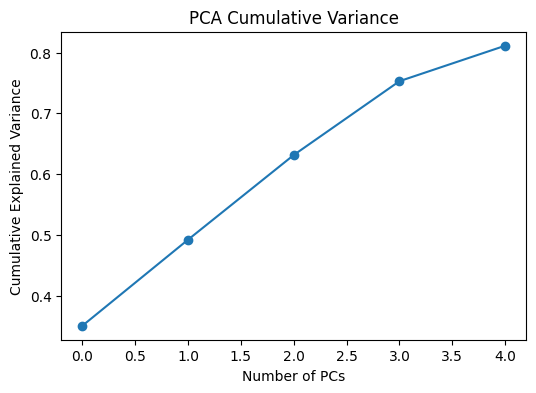

In [24]:

pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_train_scaled)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)

plt.figure(figsize=(6,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of PCs")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Cumulative Variance")
plt.show()


##Neural Network & Linear Models

In [28]:

mlp = MLPClassifier(hidden_layer_sizes=(64,), activation='relu', max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train)
mlp_acc = accuracy_score(y_test, mlp.predict(X_test_scaled))
print("MLP Accuracy:", mlp_acc)

per = Perceptron()
per.fit(X_train_scaled, y_train)
per_acc = accuracy_score(y_test, per.predict(X_test_scaled))
print("Perceptron Accuracy:", per_acc)

results["MLP"] = mlp_acc
results["Perceptron"] = per_acc
results["Custom KNN"] = cknn_acc


MLP Accuracy: 0.8
Perceptron Accuracy: 0.6705882352941176


##FINAL MODEL COMPARISON

In [26]:

results_df = pd.DataFrame.from_dict(results, orient="index", columns=["Accuracy"])
results_df = results_df.sort_values("Accuracy", ascending=False)
results_df


,Accuracy
MLP,0.800000
Logistic Regression,0.770588
Random Forest,0.764706
Naive Bayes,0.752941
Decision Tree,0.752941
Custom KNN,0.723529
SVM,0.723529
KNN,0.711765
Gradient Boosting,0.694118
Perceptron,0.670588


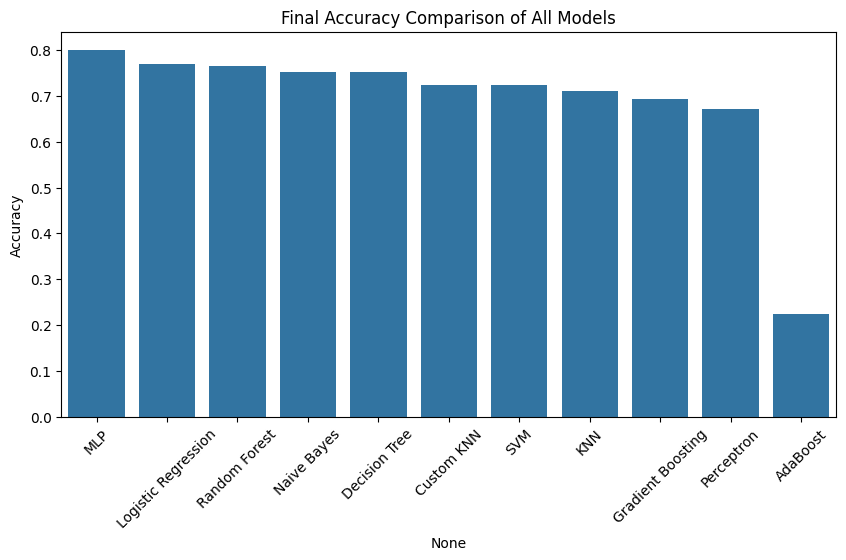

In [27]:

plt.figure(figsize=(10,5))
sns.barplot(x=results_df.index, y=results_df["Accuracy"])
plt.xticks(rotation=45)
plt.title("Final Accuracy Comparison of All Models")
plt.show()
